In [1]:
# importing libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from statsmodels.api import qqplot

In [2]:
#reading the dataset
df=pd.read_csv('Heart Disease data.csv')

In [3]:
#displaying first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# obtaining how many rows and columns are present in the dataset(rows,columns)
df.shape

(1025, 14)

In [5]:
# basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# obtaining categorical features
category_features=[]
for i in df.columns:
    if(df[i].nunique()<10):
        category_features.append(i)
        print(i)
        print(df[i].value_counts())

sex
1    713
0    312
Name: sex, dtype: int64
cp
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
fbs
0    872
1    153
Name: fbs, dtype: int64
restecg
1    513
0    497
2     15
Name: restecg, dtype: int64
exang
0    680
1    345
Name: exang, dtype: int64
slope
1    482
2    469
0     74
Name: slope, dtype: int64
ca
0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64
thal
2    544
3    410
1     64
0      7
Name: thal, dtype: int64
target
1    526
0    499
Name: target, dtype: int64


In [7]:
category_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [8]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [9]:
df.fbs.value_counts()

0    872
1    153
Name: fbs, dtype: int64

In [10]:
df.restecg.value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [11]:
df.exang.value_counts()

0    680
1    345
Name: exang, dtype: int64

In [12]:
df.slope.value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

In [13]:
df.thal.value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [14]:
# replacing numbers with different categories
df.sex.replace(to_replace={ 0:"F",  1:"M"}, inplace=True)
df.cp.replace(to_replace={0: "Typical angina",1: "Atypical angina",2:"Non-anginal pain",3:"Asymptomatic"}, inplace=True)
df.fbs.replace(to_replace={0: "True",1: "False"}, inplace=True)
df.exang.replace(to_replace={0: "No",1: "Yes"}, inplace=True)
df.slope.replace(to_replace={0: "Upsloping",1: "Flatsloping",2:"Downslopins"}, inplace=True)

df.target.replace(to_replace={0:"Yes",1:"No"}, inplace=True)
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,M,Typical angina,125,212,True,1,168,No,1.0,Downslopins,2,3,Yes
1,53,M,Typical angina,140,203,False,0,155,Yes,3.1,Upsloping,0,3,Yes
2,70,M,Typical angina,145,174,True,1,125,Yes,2.6,Upsloping,0,3,Yes
3,61,M,Typical angina,148,203,True,1,161,No,0.0,Downslopins,1,3,Yes
4,62,F,Typical angina,138,294,False,1,106,No,1.9,Flatsloping,3,2,Yes


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
ca,1025.0,0.754146,1.030798,0.0,0.0,0.0,1.0,4.0
thal,1025.0,2.323902,0.620660,0.0,2.0,2.0,3.0,3.0


## EDA

In [16]:
## checking for null values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
## checking for duplicates if any
df.duplicated().any()

True

In [18]:
df.shape

(1025, 14)

In [19]:
## droping duplicates
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [20]:
# obtaining numerical features
numerical_features=[]
for i in df.columns:
    if(df[i].nunique()>10):
        numerical_features.append(i)
numerical_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [21]:
category_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

## Data Visualization`

In [22]:
# function takes a single dataframe column name as argument and
# plots a 1 x 2 subplot contains (pie plot and bar plot)
def plot_categorial(col_name):
    fig, ax = plt.subplots(
        nrows=1, ncols=2, figsize=(14, 5)
    )  # sets 1 x 2 subplots with figure size of (14,5)
    df[col_name].value_counts().plot.pie(
        autopct="%.0f%%",
        labels=df[col_name].unique(),
        shadow=True,
        startangle=180,
        ax=ax[0],
    )  # plots pie chart of given column with % percentage

    df[col_name].value_counts().plot.bar(
        ax=ax[1]
    )

    fig.suptitle(col_name.title())  # set plot's title
    plt.show()  # shows the plot

In [23]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

In [24]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

In [25]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
def plot_stats(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.boxplot(
        y=col_name, x="target", data=df, ax=axes[0][0], palette="viridis_r"
    )  # displays boxplot of the given dataframe column
    sns.violinplot(
        y=col_name, x="target", data=df, ax=axes[0][1], split=True, palette="viridis_r"
    )  # displays violinplot of the given dataframe column
    sns.swarmplot(
        y=col_name, x="target", data=df, ax=axes[1][0], palette="viridis_r"
    )  # displays swarmplot of the given dataframe columns
    sns.barplot(
        x=col_name, y="target", data=df, hue="target", palette="viridis_r"
    )  # displays barplot of the given dataframe column respect to 'HeartDisease' column
    plt.suptitle(
        "Statistics of " + col_name
    )  # sets the title for the subplot as "Statistics of <column name>"
    plt.show()  # shows the plot

In [26]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):
    facet = sns.FacetGrid(
        df, hue="target", aspect=4, palette="bright"
    )  # sets a seaborn FacetGrid with hue = "Outcome" and palette as "bright"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "HeartDisease"
    facet.set(
        xlim=(0, df[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        col_name + " respect to Outcome"
    )  # sets the title for the plot as "<column name> respect to Outcome"
    plt.show()  # shows the plot

### plots a 1 x 2 subplot contains (pie plot and bar plot) for each numerical columns

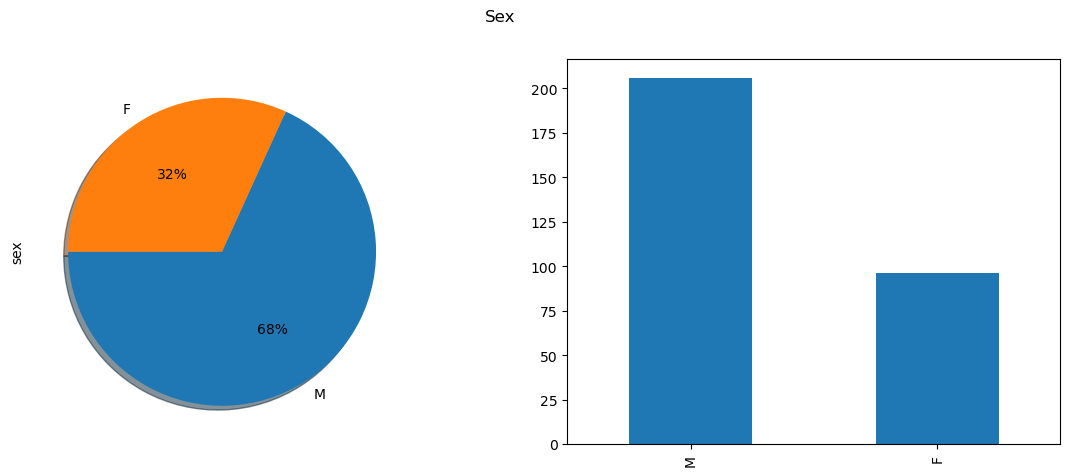

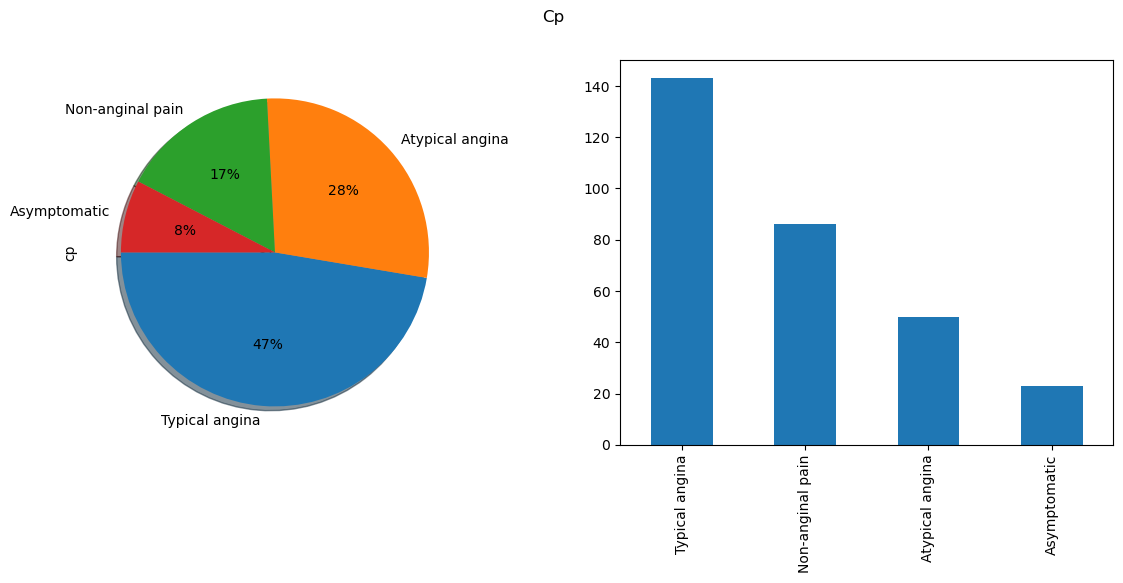

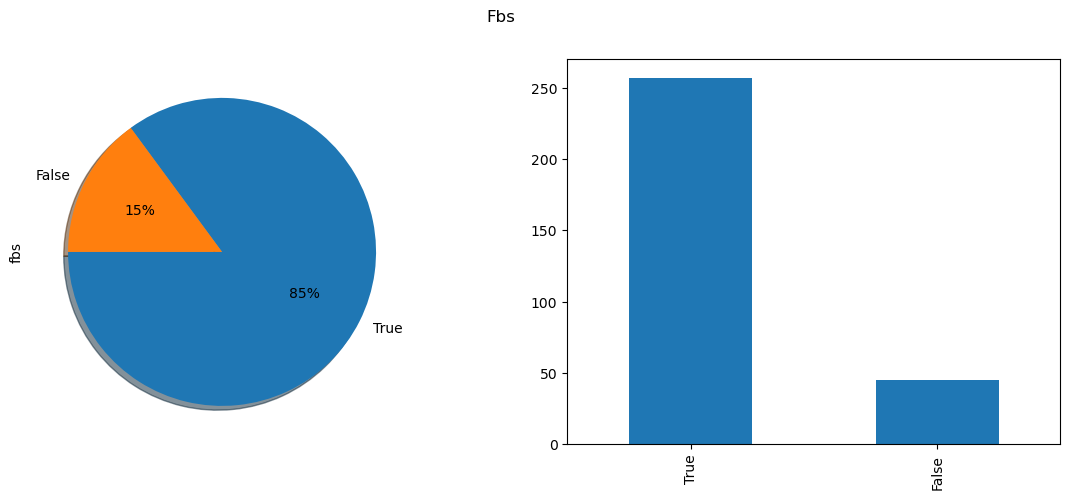

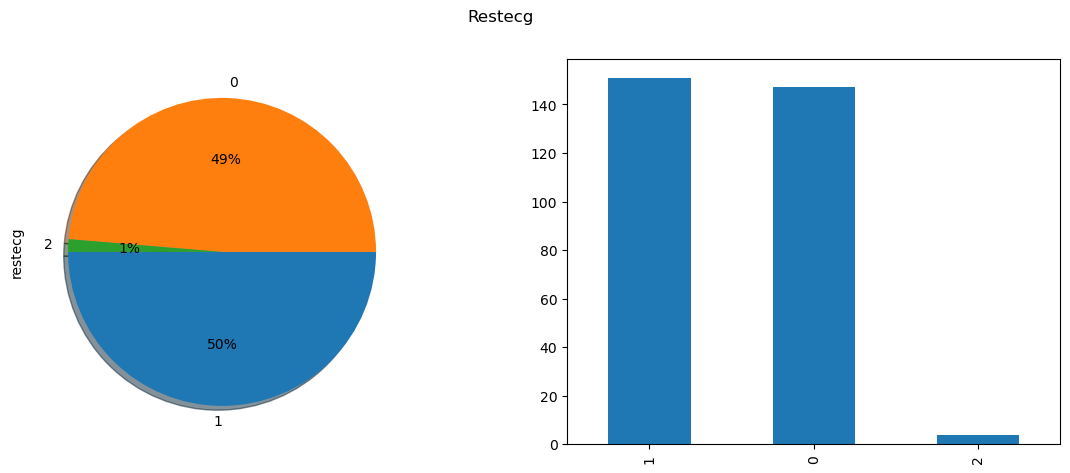

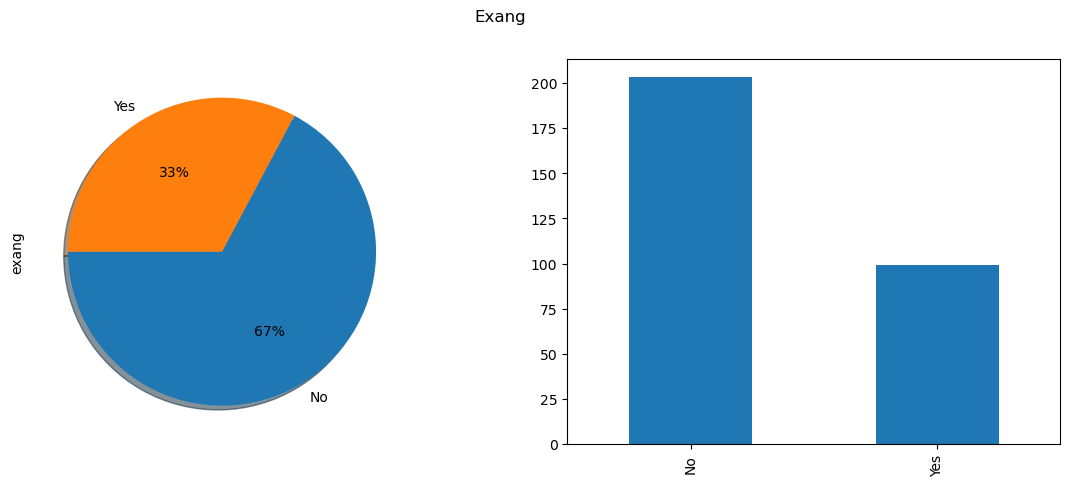

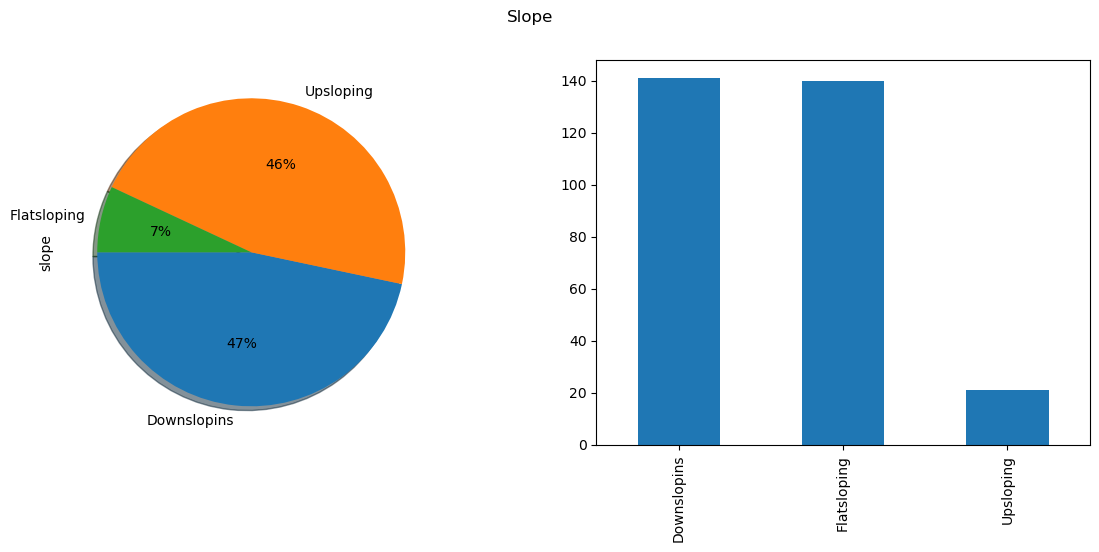

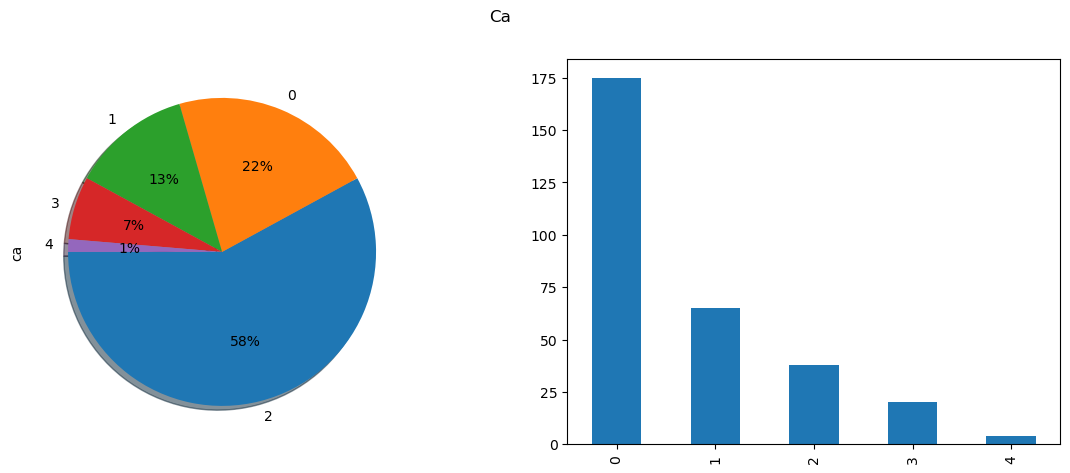

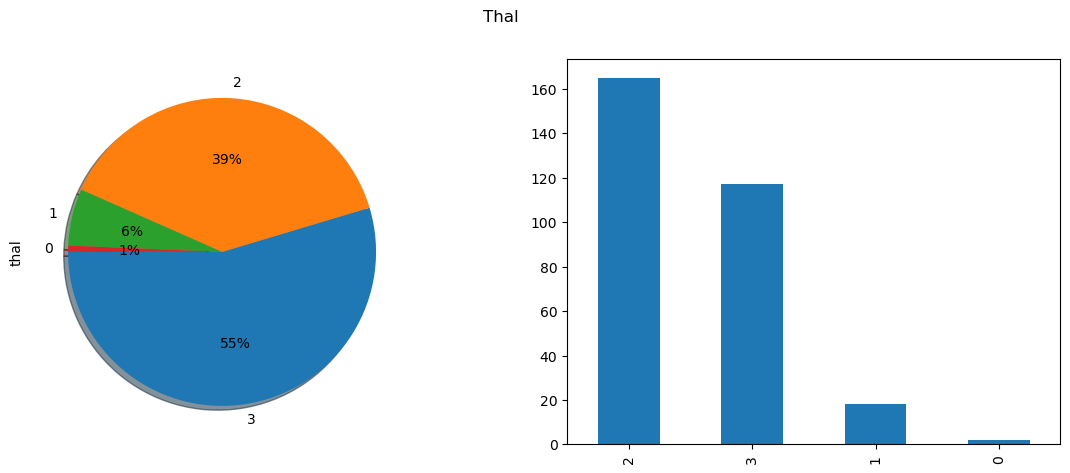

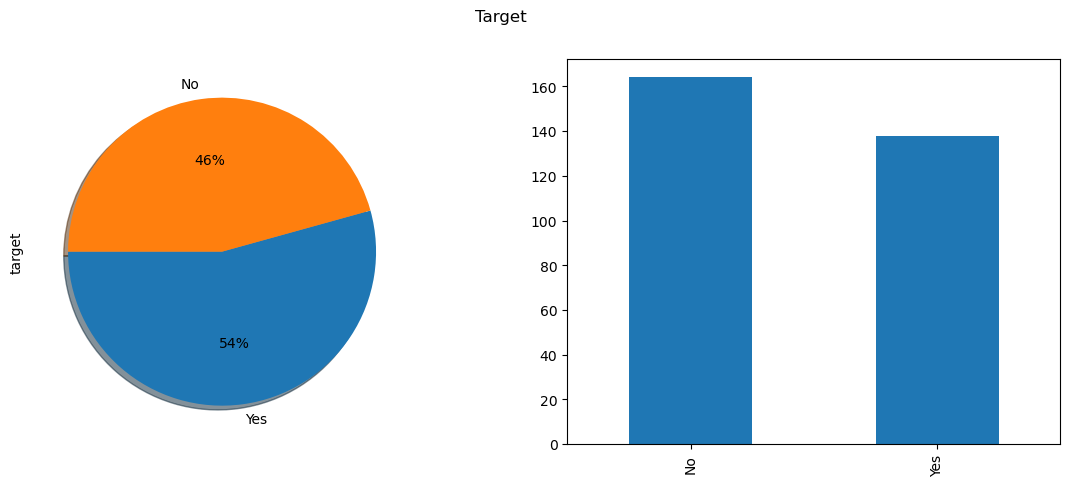

In [27]:
for i in category_features:
    plot_categorial(i)

### Kernel density estimate plot for each numerical features

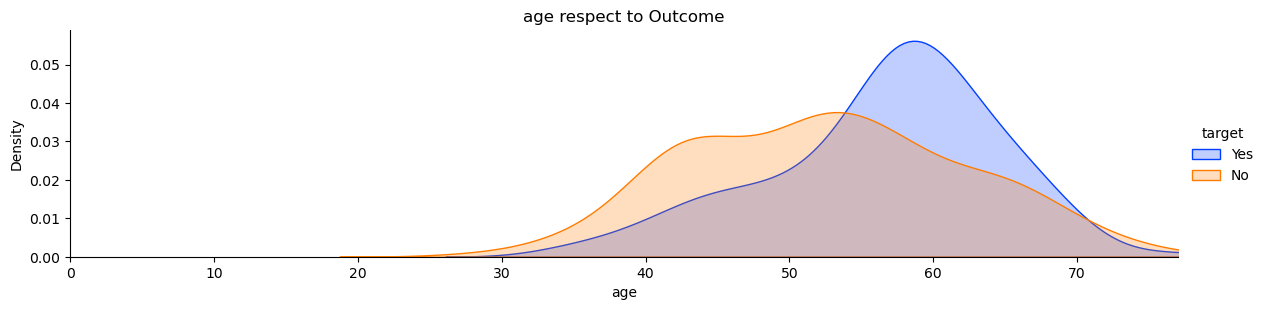

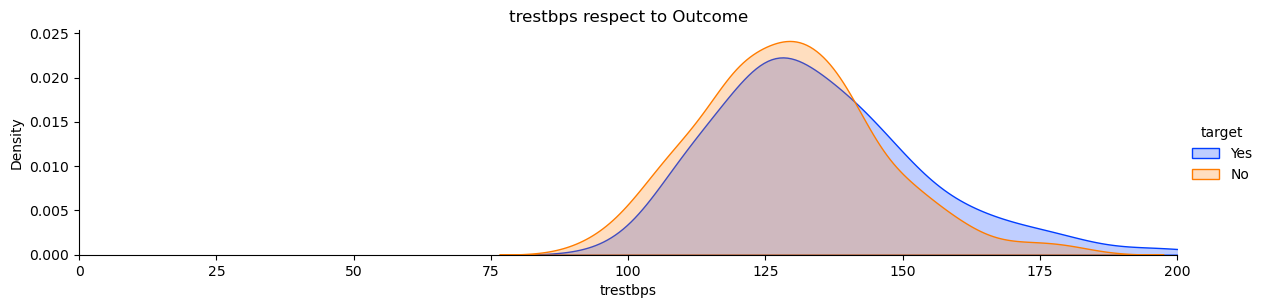

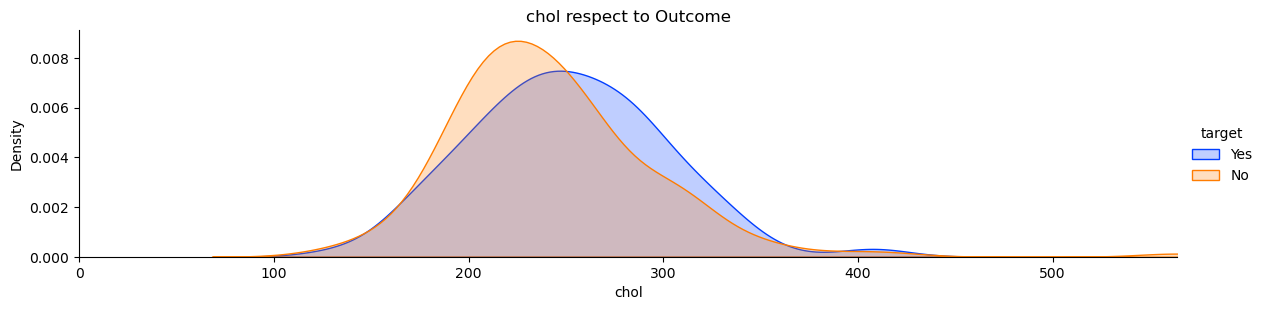

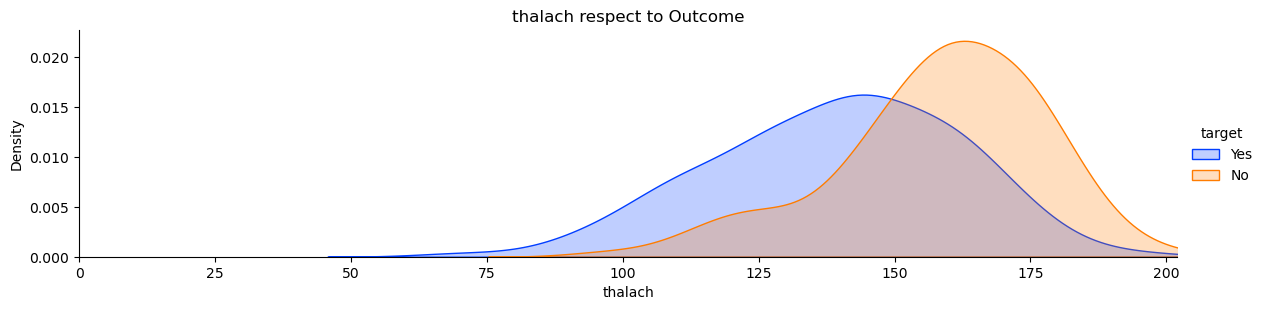

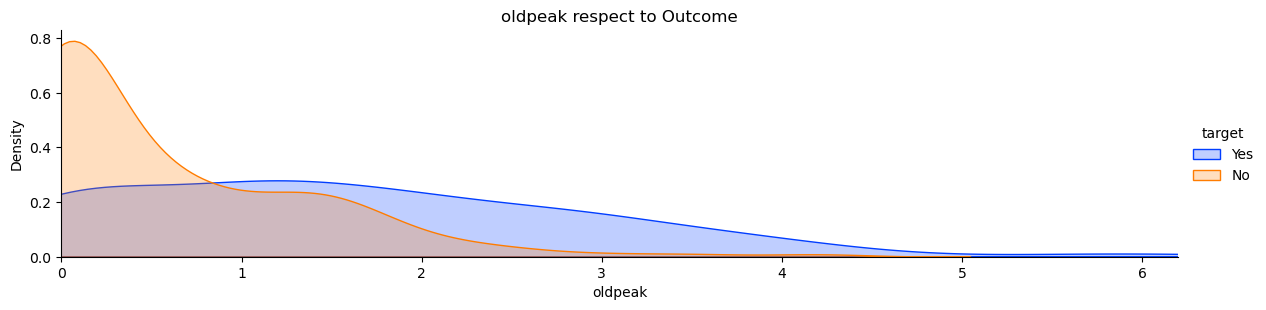

In [28]:
for i in numerical_features:
    plot_kde(i)

### plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot) for each numerical feature

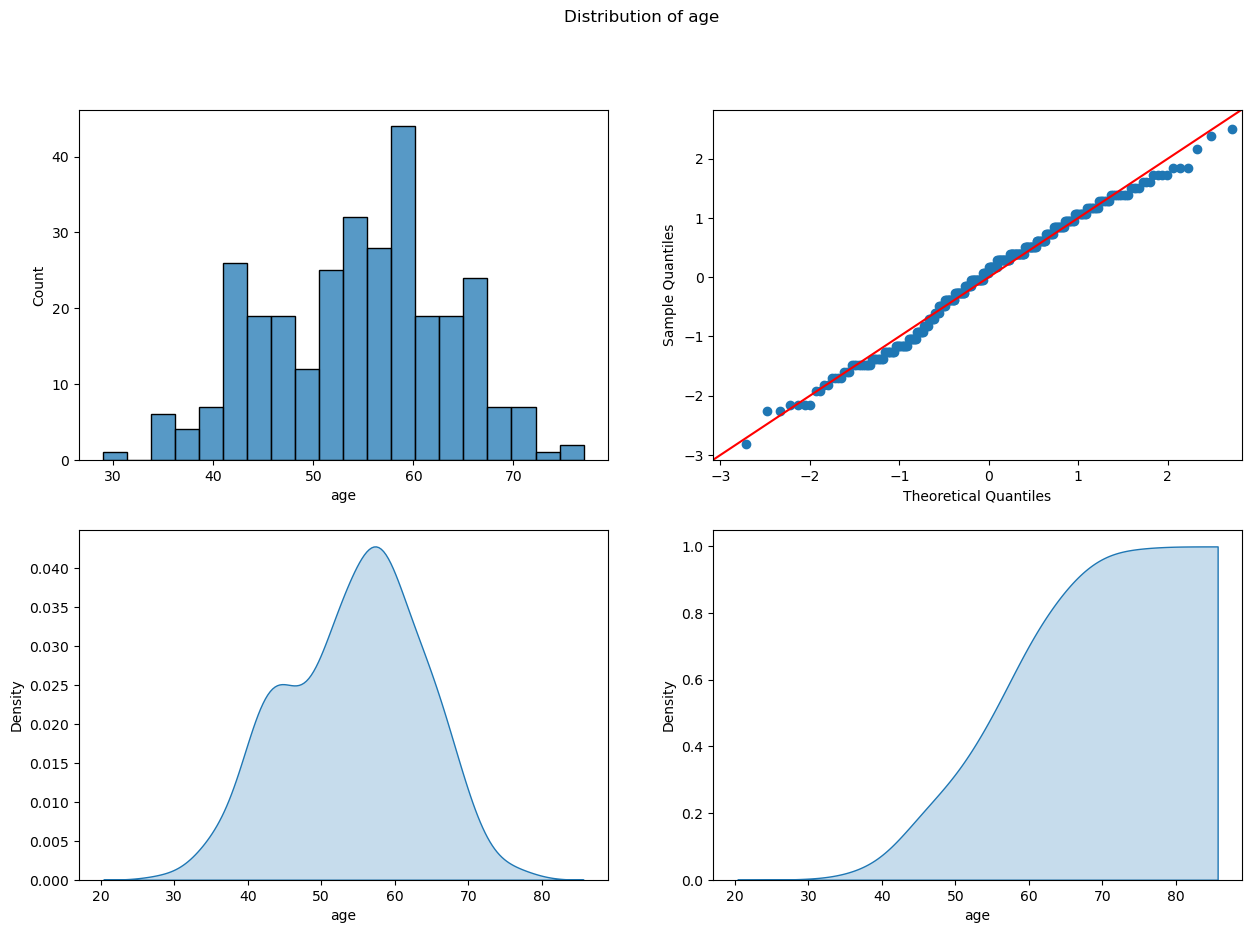

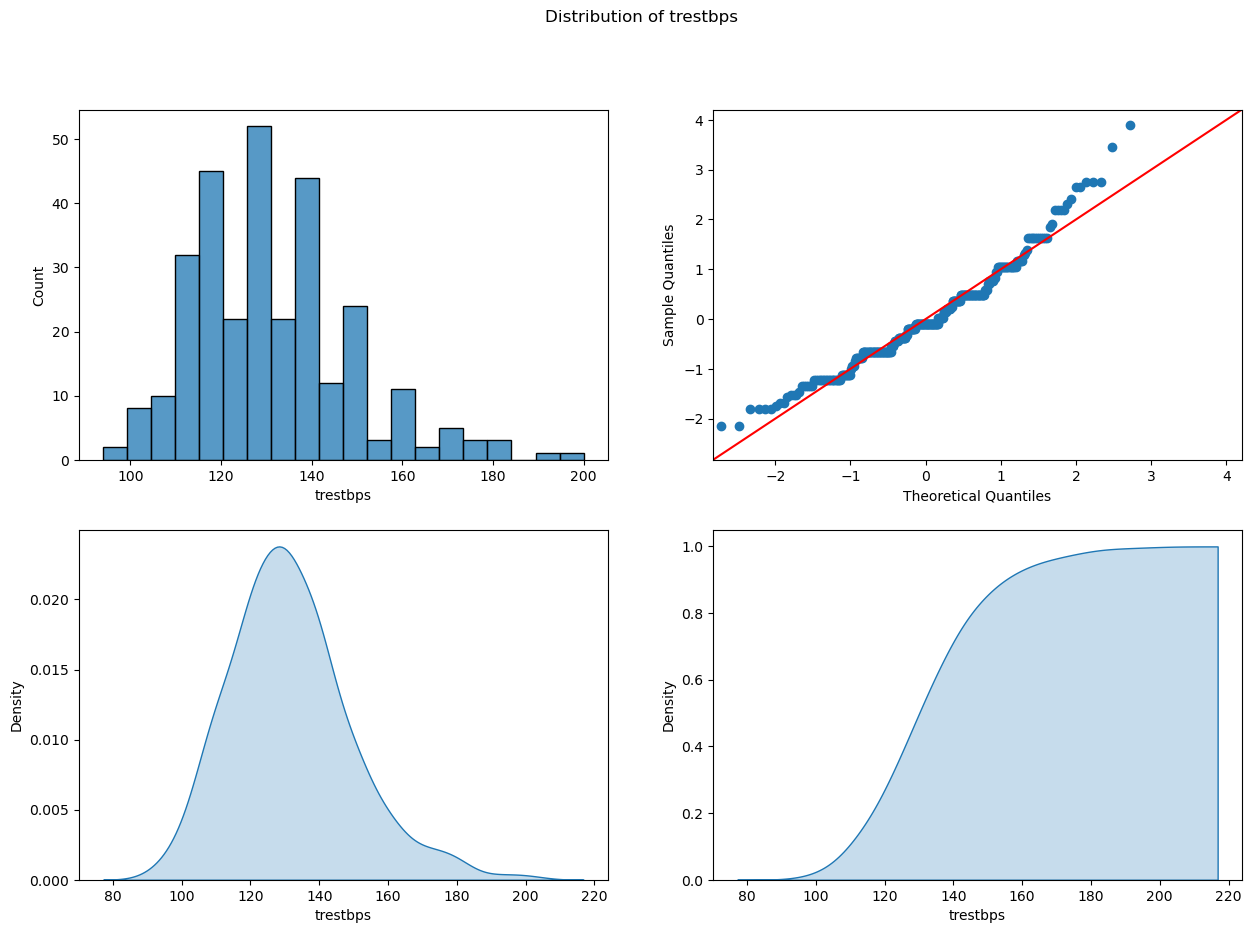

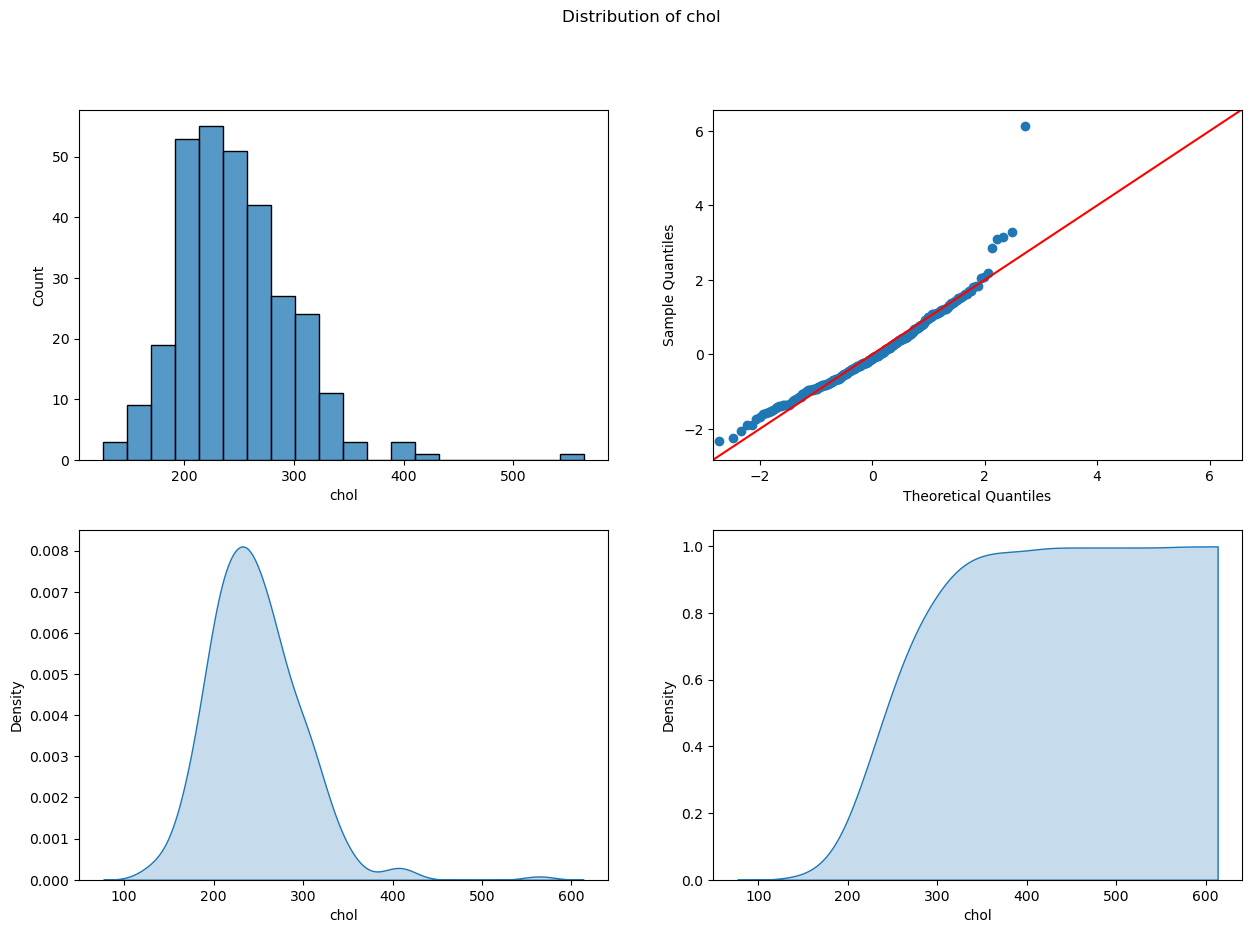

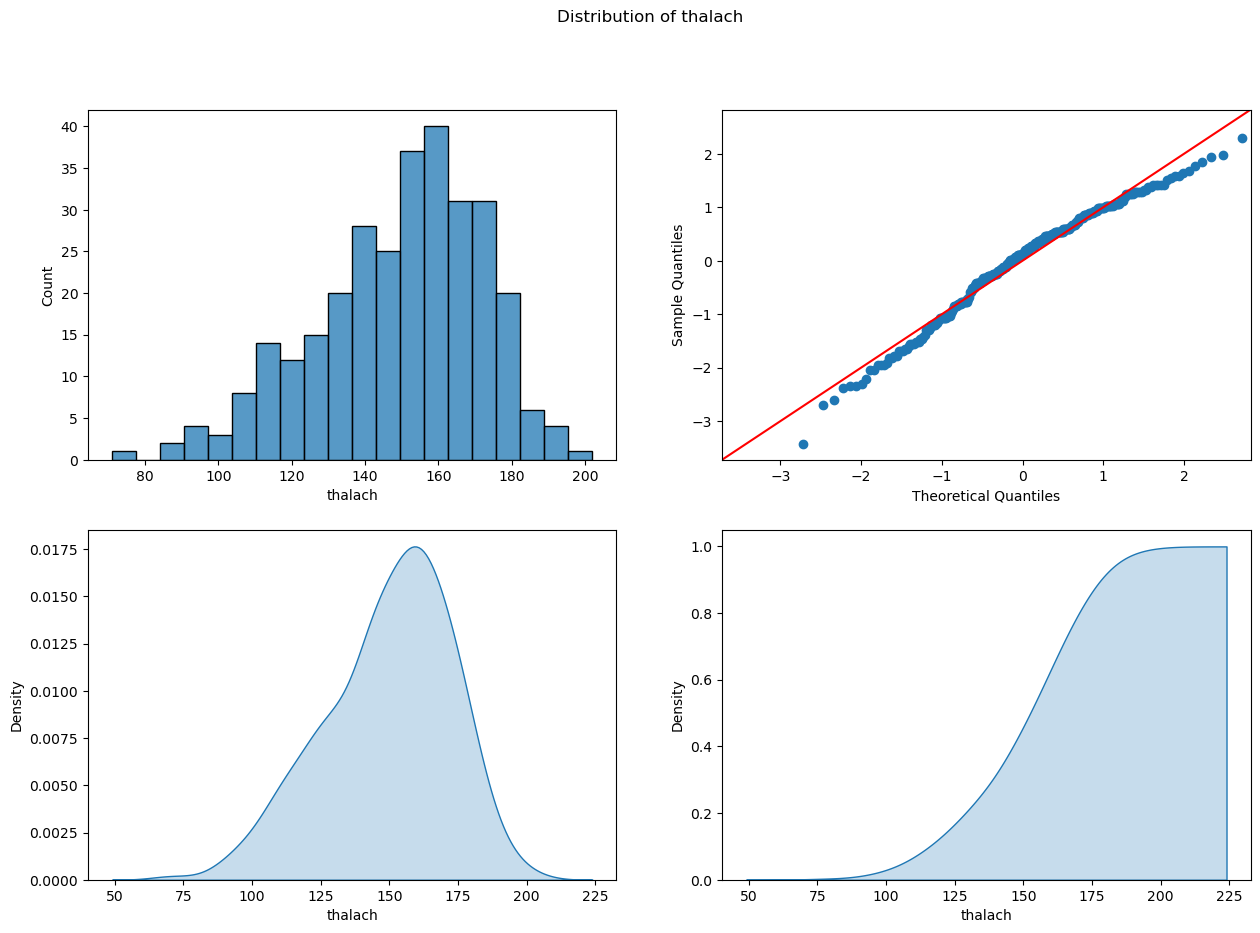

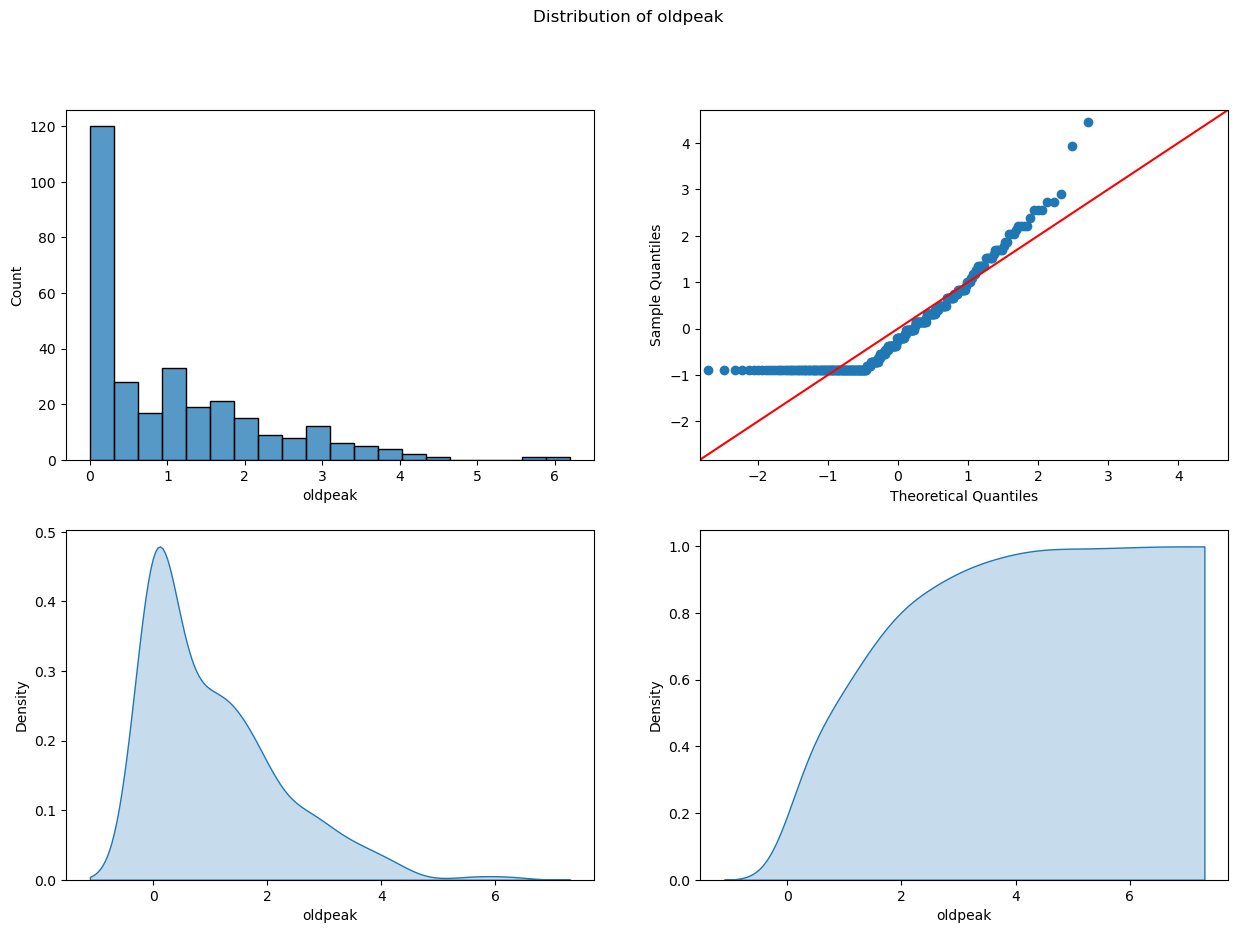

In [29]:
for i in numerical_features:
    plot_distribution(i)

### plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot) for each numerical features

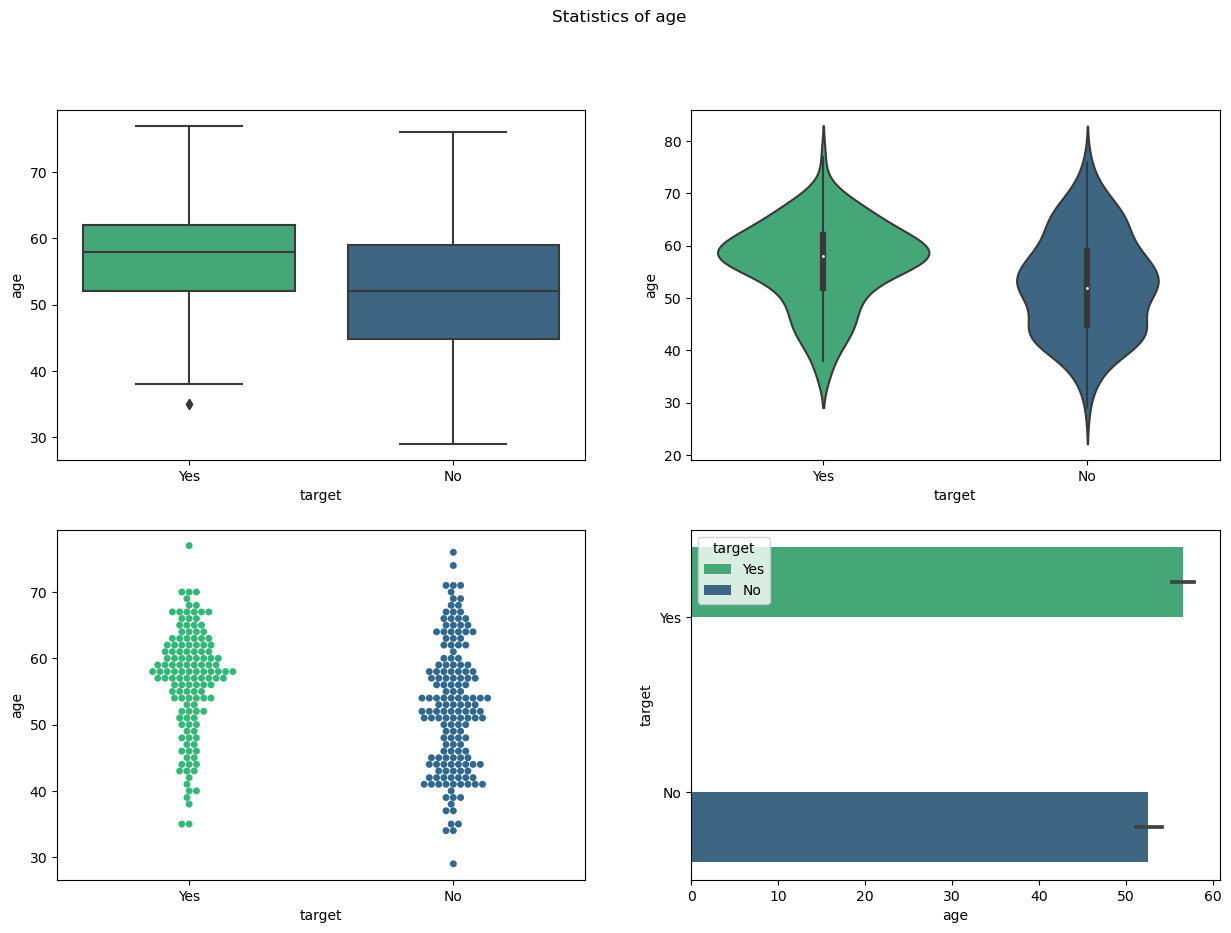

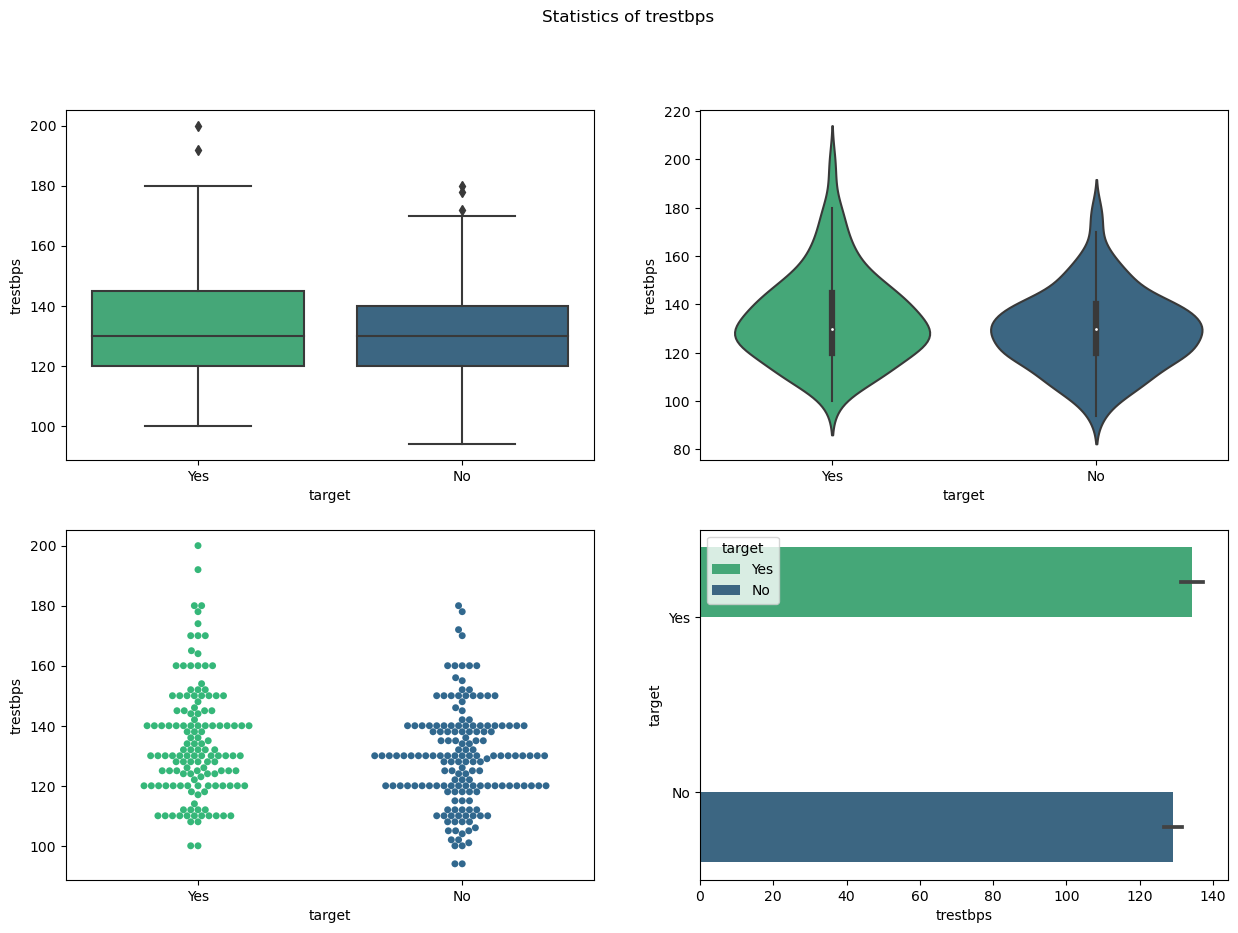

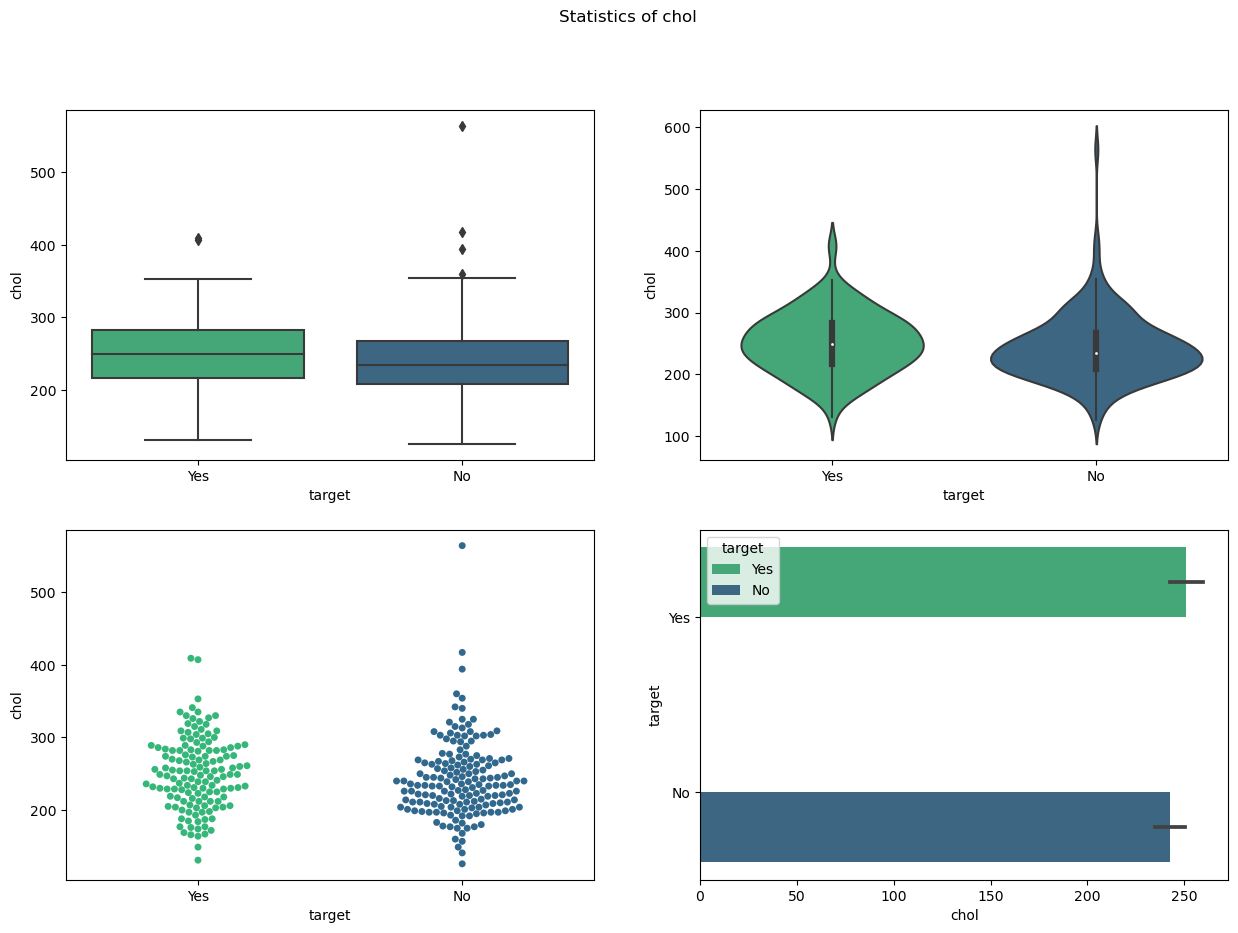

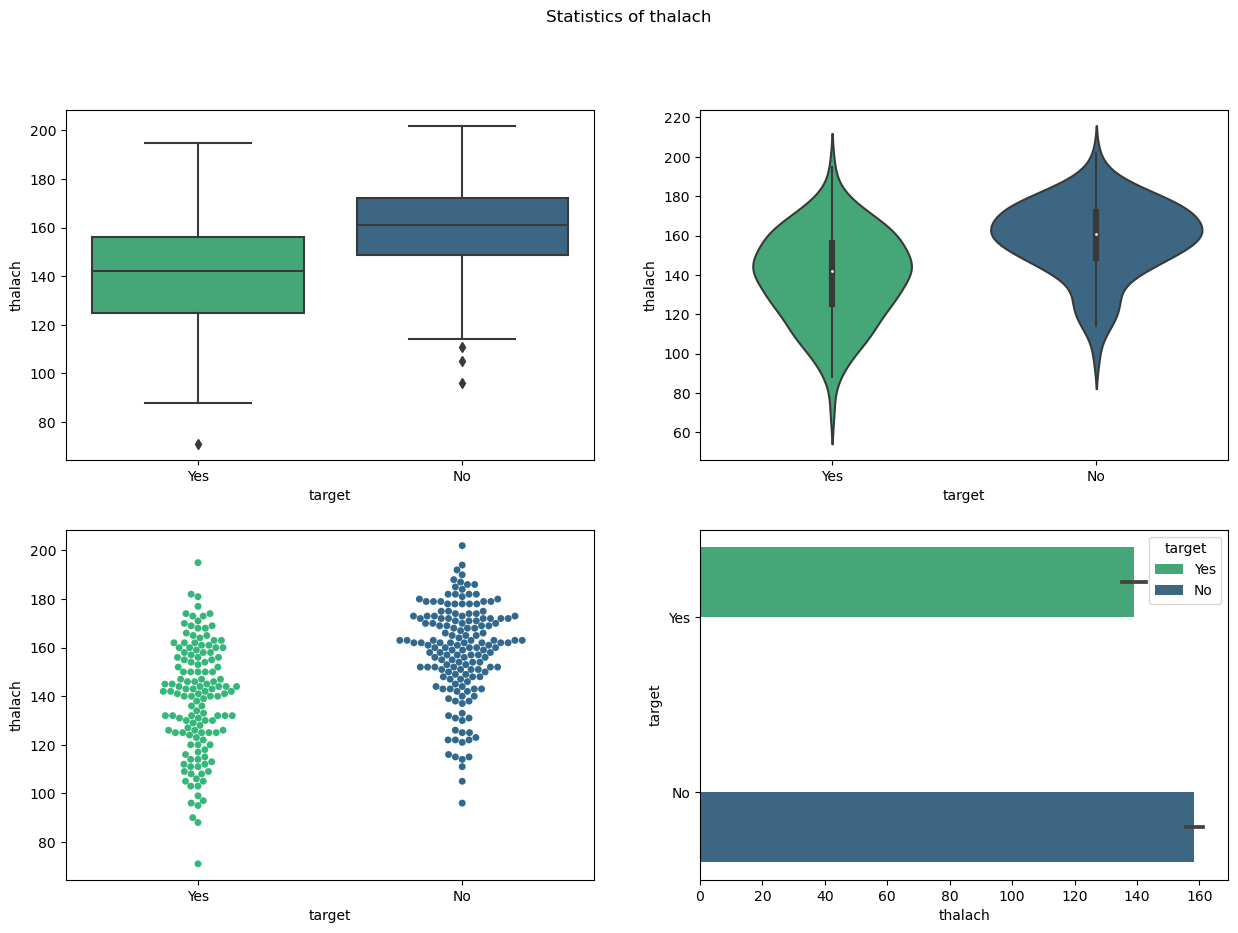

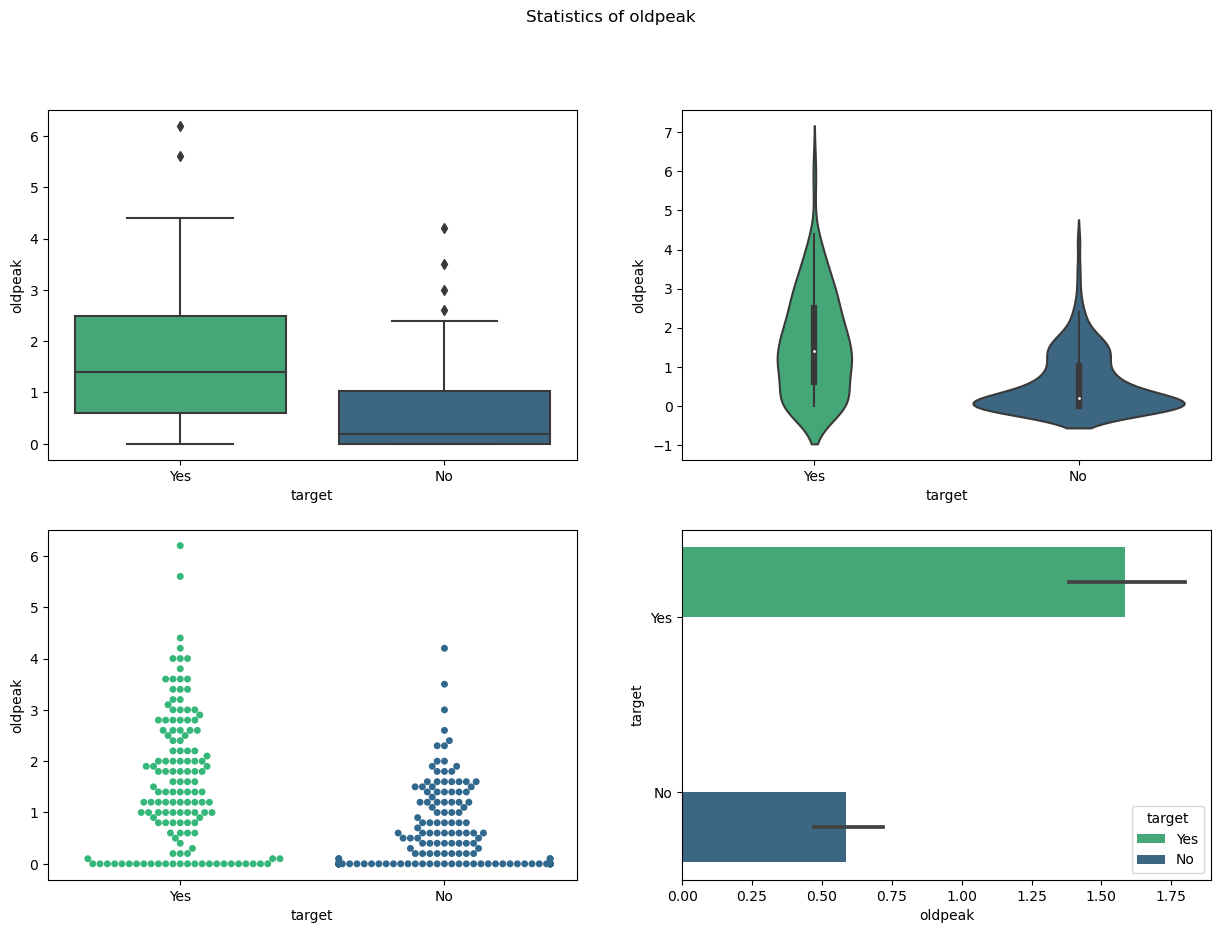

In [30]:
for i in numerical_features:
    plot_stats(i)

## PairPlot

In [31]:
## Features to change
features_to_change=[]
for i in df.columns:
    if(df[i].dtype=='object'):
        features_to_change.append(i)
features_to_change

['sex', 'cp', 'fbs', 'exang', 'slope', 'target']

In [32]:
 ## transforming categorical features to numerical (using labelEncoding technique)
from sklearn.preprocessing import LabelEncoder
df1=df.copy()
le=LabelEncoder()
for i in features_to_change:
    df1[i]=le.fit_transform(df[i])
    
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,3,125,212,1,1,168,0,1.0,0,2,3,1
1,53,1,3,140,203,0,0,155,1,3.1,2,0,3,1
2,70,1,3,145,174,1,1,125,1,2.6,2,0,3,1
3,61,1,3,148,203,1,1,161,0,0.0,0,1,3,1
4,62,0,3,138,294,0,1,106,0,1.9,1,3,2,1


## correlation

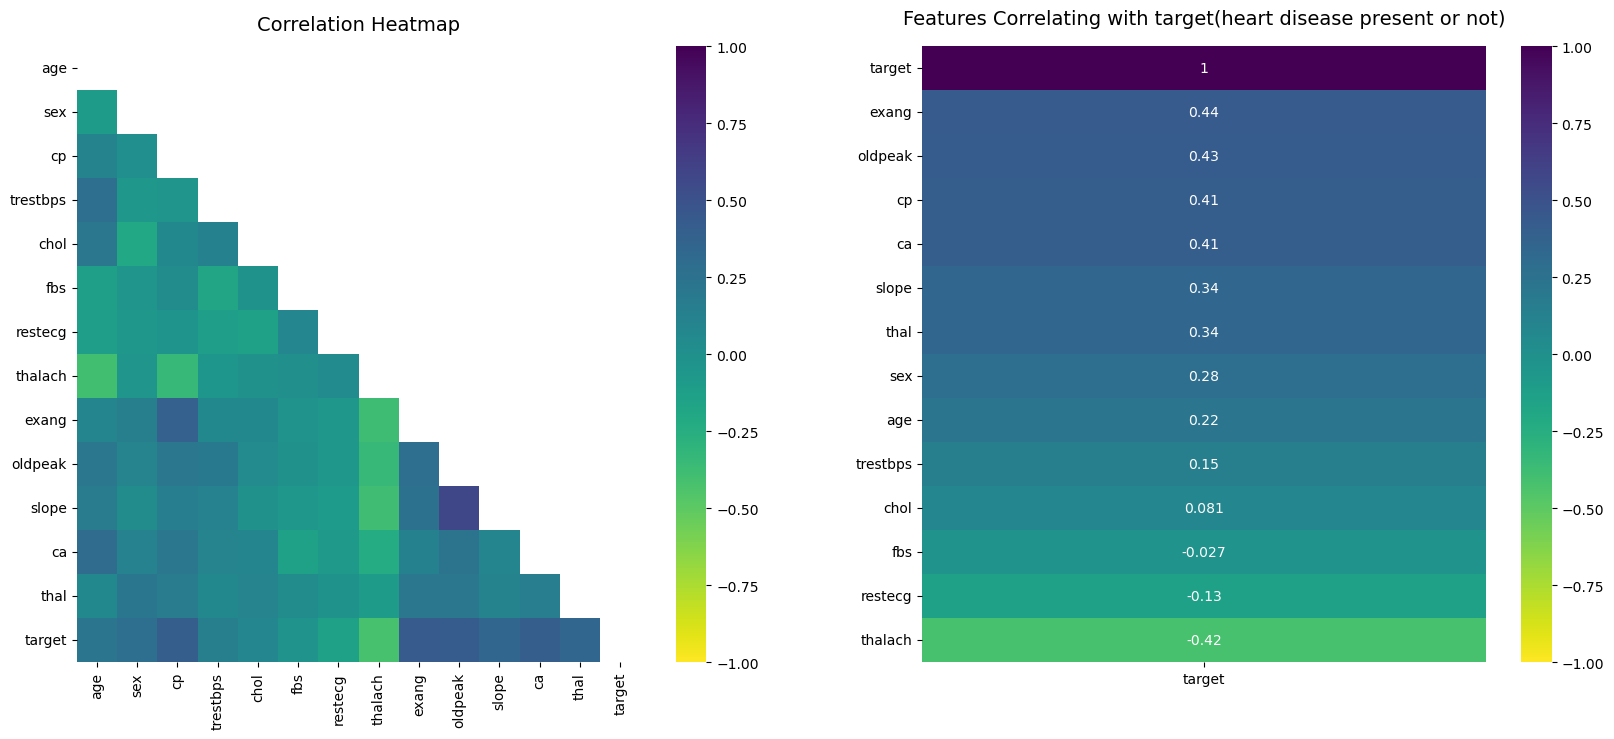

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))  # create a 1 x 2 subplot grid
resign_corr = df1.corr()  # calculate correlation of the dataframe
mask = np.triu(np.ones_like(resign_corr, dtype=bool))
cat_heatmap = sns.heatmap(
    df1.corr(), mask=mask, vmin=-1, vmax=1, annot=False, ax=ax[0], cmap="viridis_r"
)  # cornor heatmap of the dataframe correlation
cat_heatmap.set_title(
    "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
)  # sets the title for the heatmap with font size 14 and padding 12

heatmap = sns.heatmap(
    resign_corr[["target"]].sort_values(by="target", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
    cmap="viridis_r",
)  # create heatmap for features correlating with the dependant varibale 'HeartDisease'
heatmap.set_title(
    "Features Correlating with target(heart disease present or not)",
    fontdict={"fontsize": 14},
    pad=16,  # sets the title for the heatmap with font size 14 and padding 16
)
plt.show()  # shows the subplot

## Pairplot

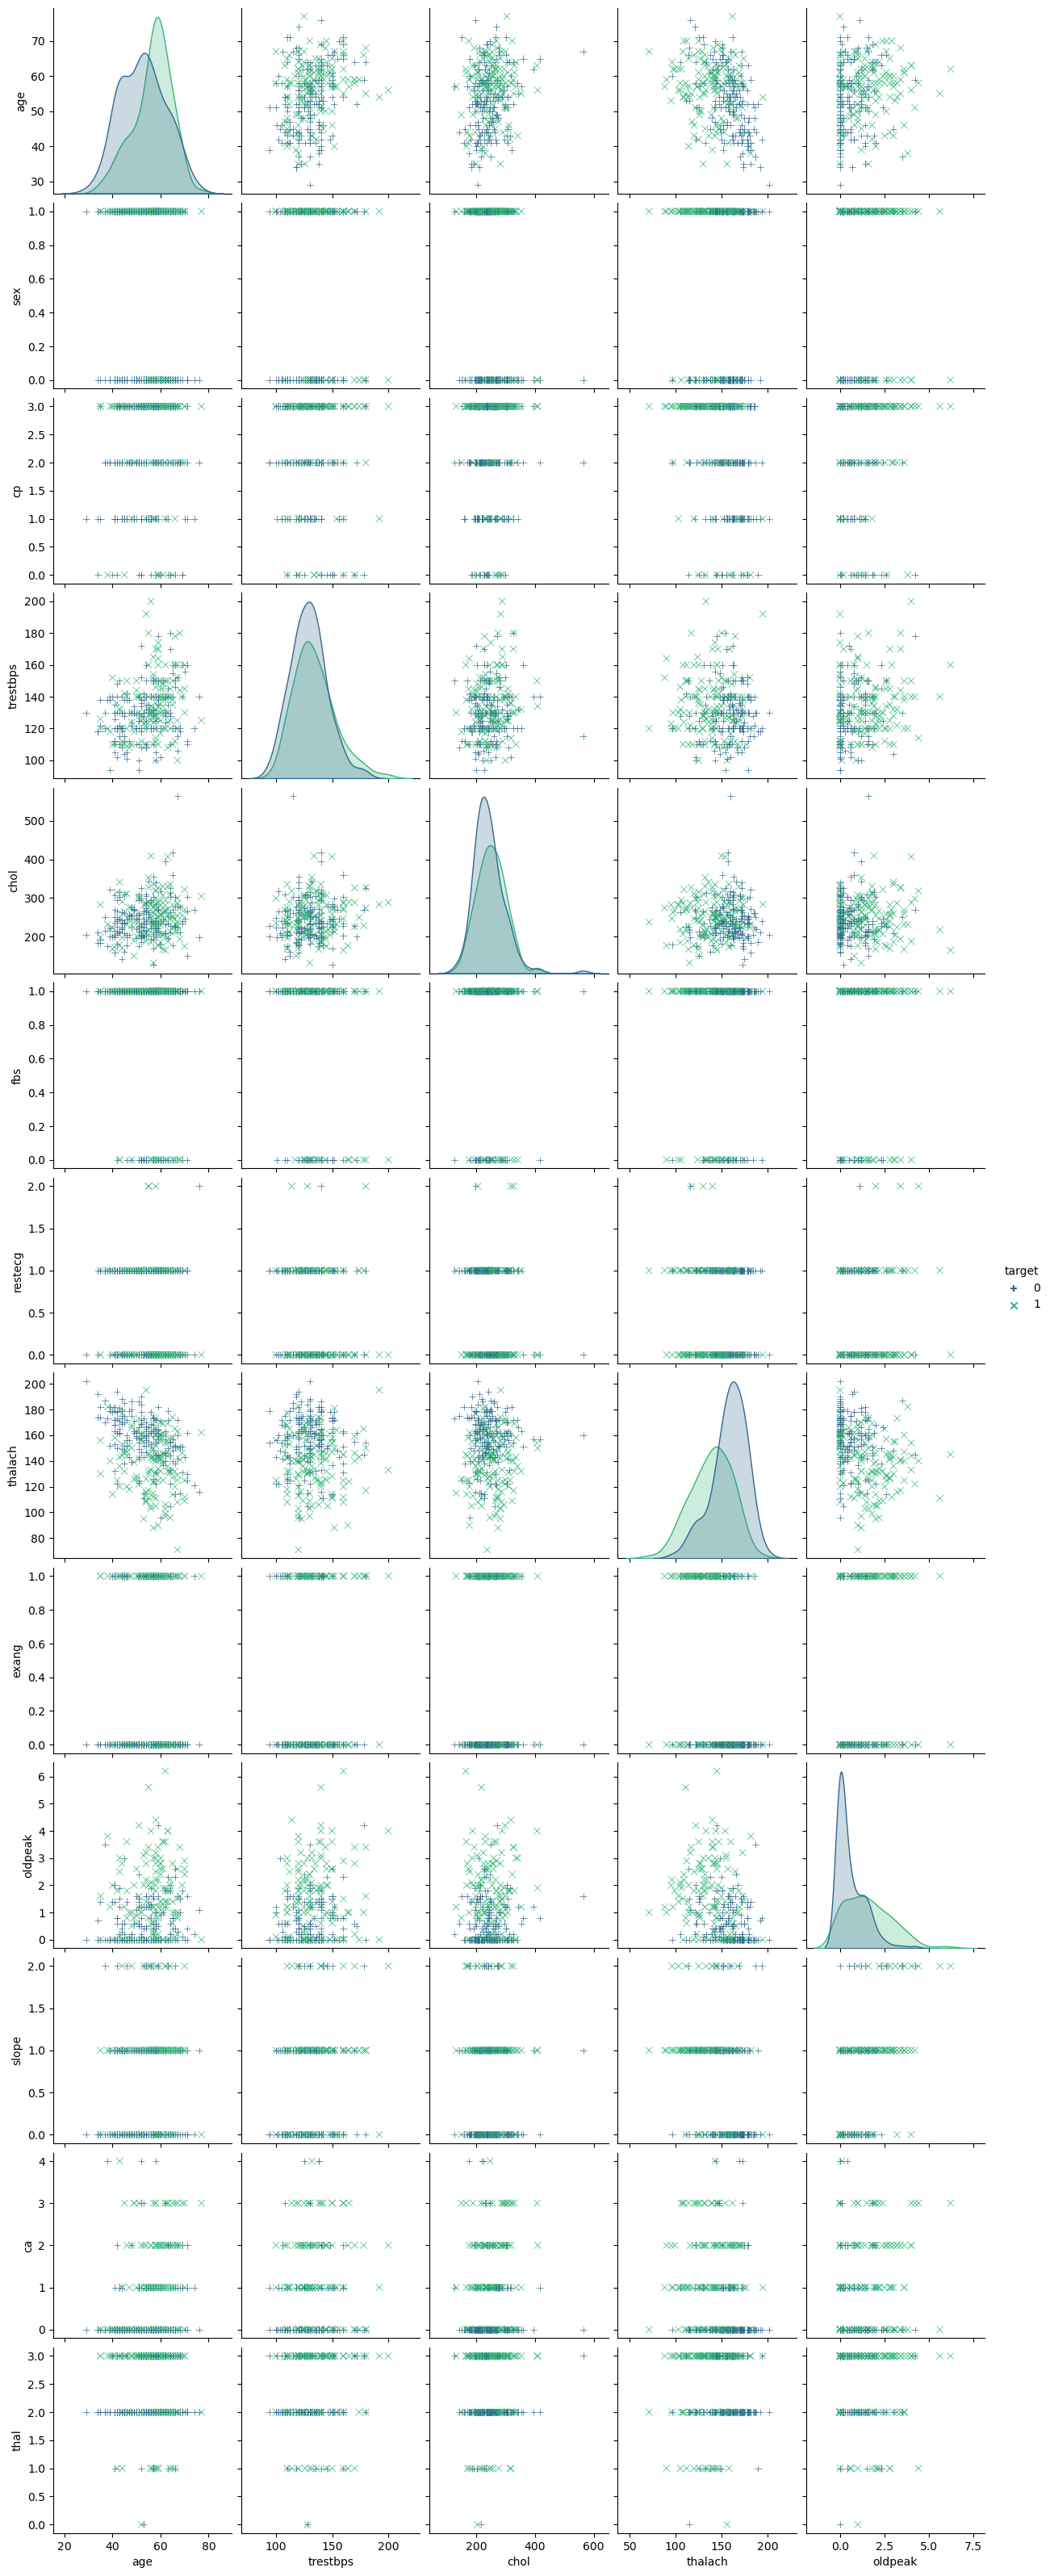

In [34]:
sns.pairplot(
    df1,
    hue="target",
    x_vars=numerical_features,
    markers=["+", "x"],
    palette="viridis",
)  # pairplot with given columns in x axis and all columns in y axis
plt.show()  # shows the plot

### Observations after EDA:
1. Males are consistently more likely to have heart disease.
2. Most of heart disease Patients have age between 55 and 65.
3. Most patients with 0 oldpeak, don't have Heart disease
4. The cholesterol level slightly depends on heart disease. People with high cholesterol levels may have a higher risk of developing heart disease.
5. Maximum Heart Rate (thalach): Higher maximum heart rates are generally associated with a lower likelihood of having heart disease.
6. Resting Blood Pressure (trestbps): A resting blood pressure around 130 mm Hg is more commonly associated with heart disease.